In [22]:
'''Ejercicio 3.18.7.
Crea un dataframe y clasifica las variables según el tipo al que corresponda. 
Por ejemplo, si tienes una variable que solo puede tener valor cero o uno, y por defecto aparece como int64 u object, modifica su tipo a binaria (categórica con dos valores posibles).
Los clientes pueden pedir todos los artículos que quieran de nuestras 350 referencias y tienen cuatro formas de pago.
Además, solo se reparte en cuatro zonas identificadas con los números del 0 al 3, siempre dando prioridad a la zona 0, luego a la 1, después a la 2 y, por último, a la zona 3.

Comparte la información final de las variables y el código utilizado para conseguirlo.'''

import pandas as pd
data = {
    'Nombre': ['Luis Zafra', 'Gemma Sanz', 'Lourdes Mora', 'Isaac Pérez', 'Sonia Gracia', 'Alberto Lungo', 'Tamara López'],
    'Fecha nacimiento': ['15/05/1993', '25/04/2000', '04/12/1985', '18/10/1999', '02/08/2001', '11/11/1986', '06/07/1991'],
    'Zona': [0, 2, 1, 3, 0, 1, 1],
    'Artículo': [348, 125, 3, 248, 124, 17, 157],
    'Cantidad': [1, 3, 2, 1, 1, 1, 2],
    'Entregado': ['Sí', 'No', 'Sí', 'Sí', 'No', 'Sí', 'Sí'],
    'Método pago': ['Tarjeta', 'Transferencia', 'Bizum', 'Tarjeta', 'Tarjeta', 'Transferencia', 'Contrareembolso'],
    'Dto': ['No', 'Sí', 'No', 'No', 'No', 'Sí', 'Sí']
}

df = pd.DataFrame(data)

df2 =df.copy()
df2['Nombre'] = df2['Artículo'].astype('string')
df2['Fecha nacimiento'] = pd.to_datetime(df2['Fecha nacimiento'], format='%d/%m/%Y')
df2['Zona'] = df2['Zona'].astype('category')
df2['Entregado'] = df2['Entregado'].map({'Sí': 1, 'No': 0}).astype('category')
df2['Método pago'] = df2['Método pago'].astype('category')
df2['Dto'] = df2['Dto'].map({'Sí': 1, 'No': 0}).astype('category')
df2['Artículo'] = df2['Artículo'].astype('int64')

print(df.dtypes)
print(df2.dtypes)
df2

Nombre              object
Fecha nacimiento    object
Zona                 int64
Artículo             int64
Cantidad             int64
Entregado           object
Método pago         object
Dto                 object
dtype: object
Nombre                      string
Fecha nacimiento    datetime64[ns]
Zona                      category
Artículo                     int64
Cantidad                     int64
Entregado                 category
Método pago               category
Dto                       category
dtype: object


,Nombre,Fecha nacimiento,Zona,Artículo,Cantidad,Entregado,Método pago,Dto
0,348,1993-05-15,0,348,1,1,Tarjeta,0
1,125,2000-04-25,2,125,3,0,Transferencia,1
2,3,1985-12-04,1,3,2,1,Bizum,0
3,248,1999-10-18,3,248,1,1,Tarjeta,0
4,124,2001-08-02,0,124,1,0,Tarjeta,0
5,17,1986-11-11,1,17,1,1,Transferencia,1
6,157,1991-07-06,1,157,2,1,Contrareembolso,1


In [23]:
'''Ejercicio 3.18.8.
Como regalo a los clientes, se les va a realizar un regalo a los clientes el año que cumplan 40 años, por lo que, para tenerlo contemplado, crea una nueva columna en el dataframe, “40 cumpleaños”, y suma, a la fecha de nacimiento 40 años para tener la fecha en la que habrá que hacerles los regalos.
NOTA:Para realizar este ejercicio vamos a suponer que todos los años tienen 365 días.'''

df2['40 cumpleaños'] = df2['Fecha nacimiento'] + pd.DateOffset(years=40)
df2


,Nombre,Fecha nacimiento,Zona,Artículo,Cantidad,Entregado,Método pago,Dto,40 cumpleaños
0,348,1993-05-15,0,348,1,1,Tarjeta,0,2033-05-15
1,125,2000-04-25,2,125,3,0,Transferencia,1,2040-04-25
2,3,1985-12-04,1,3,2,1,Bizum,0,2025-12-04
3,248,1999-10-18,3,248,1,1,Tarjeta,0,2039-10-18
4,124,2001-08-02,0,124,1,0,Tarjeta,0,2041-08-02
5,17,1986-11-11,1,17,1,1,Transferencia,1,2026-11-11
6,157,1991-07-06,1,157,2,1,Contrareembolso,1,2031-07-06


Coeficiente a: [304.18307453]
Término independinete b: 152.13348416289605


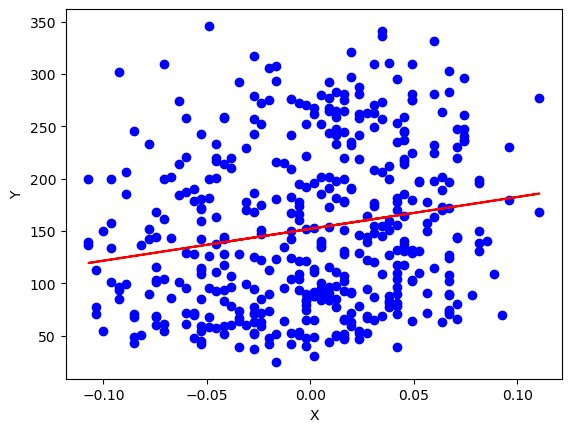

In [27]:
'''Ejercicio 3.19.1.
Carga el dataset diabetes de sklearn y aplica el modelo de regresión lineal simple
utilizando la primera columna del dataset como variable independiente. ¿Qué conclusiones puedes sacar?'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

x_train =diabetes.data[:,0].reshape(-1,1)
y_train =diabetes.target

reg = LinearRegression().fit(x_train,y_train) #Podemos ver los coeficientes del modelo (a,b) 
print("Coeficiente a:",reg.coef_)
print("Término independinete b:", reg.intercept_)

plt.scatter(x_train,y_train, color="blue")
#Mostramos la línea de regresión
plt.plot(x_train, reg.predict(x_train), color="red")
#Añadimos las etiquetas a los ejes
plt.xlabel("X") 
plt.ylabel("Y") #Mostramos la gráfica 
plt.show()



In [32]:
'''Ejercicio 3.19.2.
Con los mismos datos, pero utilizando las dos primeras columnas como variables independientes, 
aplica el modelo de regresión lineal múltiple. ¿Cuáles son las conclusiones que obtienes aquí?'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

x_train =diabetes.data[:,:2]
y_train =diabetes.target

reg = LinearRegression().fit(x_train,y_train) #Podemos ver los coeficientes del modelo (a,b) 
print("Coeficientes de las dos variables:",reg.coef_) 
print("Término independiente b:", reg.intercept_)

pred = reg.predict(x_train)
pred

Coeficientes de las dos variables: [301.16135996  17.3924542 ]
Término independiente b: 152.13348416289605


array([164.48192757, 150.79026589, 178.70367043, 124.53474061,
       152.97822633, 123.44076039, 139.32038251, 172.13978911,
       165.57590779, 130.00464171, 122.34678017, 161.19998691,
       156.26016699, 154.63610559, 165.01200875, 137.13242207,
       149.69628567, 174.32774955, 139.85046369, 143.13240435,
       136.56852303, 127.28660009, 125.62872083, 166.66988801,
       132.19260215, 132.75650119, 119.06483951, 144.22638457,
       167.19996919, 173.23376933, 133.28658237, 144.22638457,
       163.38794735, 160.63608787, 156.26016699, 167.76386823,
       155.16618677, 148.60230545, 152.44814515, 152.44814515,
       154.63610559, 121.25279995, 134.94446163, 157.35414721,
       166.66988801, 161.19998691, 134.38056259, 127.81668127,
       173.23376933, 140.41436273, 161.73006809, 171.04580889,
       135.47454281, 148.60230545, 136.56852303, 138.75648347,
       138.75648347, 143.13240435, 163.91802853, 172.13978911,
       130.00464171, 140.41436273, 144.79028361, 140.94

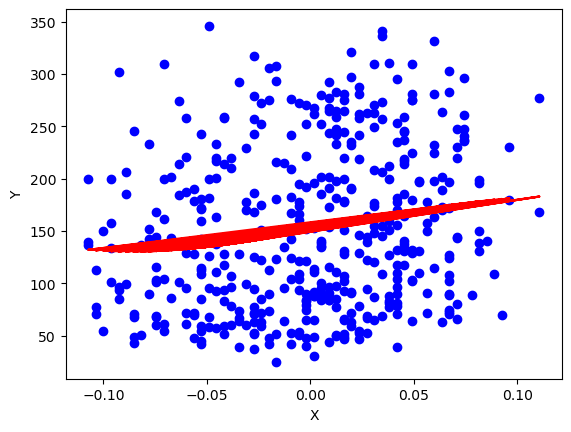

In [9]:
'''Ejercicio 3.19.3.
¿Tendría sentido aplicar el modelo de regresión polinómica a este dataset? ¿Por qué sí o por qué no?'''
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

x =diabetes.data[:,0]
y =diabetes.target

poly = PolynomialFeatures(degree=3) 
x_poly = poly.fit_transform(x.reshape(-1,1)) #Ajustamos el modelo
model = LinearRegression() 
model.fit(x_poly,y)
y_pred = model.predict(x_poly) #Ajustamos la línea
plt.plot(x, y_pred, color ="red") #Representamos los puntos
plt.scatter(x, y, color = "blue")
#Añadimos las etiquetas a los ejes 
plt.xlabel("X")
plt.ylabel("Y")
#Mostramos la gráfica
plt.show()

In [14]:
'''Ejercicio 3.19.4.
Si aplicas el modelo de regresión logística a todo el dataset, ¿cuál es la precisión del modelo?'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

x =diabetes.data
y =diabetes.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Precisión:{:2f}%'.format(clf.score(x_test,y_test)*100))



Precisión:1.123596%


In [15]:
'''Ejercicio 3.19.5.
Y si utilizas ahora el modelo de regularización de Ridge, ¿cuál es el resultado? ¿Es válido el modelo?'''
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression


diabetes = load_diabetes()

x =diabetes.data
y =diabetes.target

 #Generamos los datos de prueba
x, y = make_regression(n_samples=100, n_features=10, noise = 0.5)
#Generamos un modelo Ridge
ridge = Ridge(alpha=0.1)
#Entrenamos el modelo
ridge.fit(x,y)
#Hacemos las predicciones
y_pred = ridge.predict(x)
#Calculamos la puntuación del modelo
score = ridge.score(X=x, y=y)
#Mostramos los resultados
print("Puntuación del modelo:",score) 
print("Coeficientes: \n", ridge.coef_) 
print("Término independiente:", ridge.intercept_)

Puntuación del modelo: 0.999994210865895
Coeficientes: 
 [38.78342314 76.0226368  10.60905171 56.67988885  0.20086717  2.62682852
 53.22632009 89.24911284 50.56166166 25.07529827]
Término independiente: -0.036629329583309556


In [17]:
'''Ejercicio 3.19.6.
Y si utilizas el modelo de regularización de Lasso, ¿qué conclusiones obtienes?'''

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression #Generamos los datos de prueba
X,y = make_regression(n_features=10, noise=0.1) #Generamos un objeto Lasso
reg = Lasso(alpha=0.5)
#Entrenamos el modelo con los datos de prueba 
reg.fit(X,y)
#Calculamos la puntuación del modelo
score = reg.score(X=x, y=y)
#Mostramos los resultados
print("Coeficientes: \n", reg.coef_)
print("Término independiente:", reg.intercept_) 
print("Puntuación del modelo:",score)

Coeficientes: 
 [63.10797283 35.14183941 22.64980408 55.35430002 74.14411448 10.33012338
 31.43011994  9.74429929 78.10444496 24.86638956]
Término independiente: 0.04556526876967748
Puntuación del modelo: -1.211966799315598


In [37]:
'''Ejercicio 3.20.1
Carga el dataset digits de sklearn y aplícale el algoritmo de árboles de decisión para ver su puntuación y realizar una predicción, 
tomando como datos para realizar la predicción valores generados aleatoriamente con random.'''

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
#Creamos los datos de entrenamiento
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

#Creamos una instancia del árbol de decisión
clf = tree.DecisionTreeClassifier()
#Entrenamos el árbol de decisión con los datos de entrenamiento 
clf = clf.fit(X,y)

random =np.random.randint(0,16, size=(1,X.shape[1]))
#Mostramos la puntuación del modelo
print("Puntuación:", clf.score(X,y))

print("Predicción de un elemento:", clf.predict(random))



Puntuación: 1.0
Predicción de un elemento: [0]


In [40]:
'''Ejercicio 3.20.2
Realiza el ejercicio anterior, pero basándolo en el índice de impureza de Gini y con una profundidad máxima de 8. 
¿El resultado es el mismo que antes? ¿Por qué?'''
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
#Creamos los datos de entrenamiento
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)
#Creamos una instancia del árbol de decisión
clf = tree.DecisionTreeClassifier(criterion = 'gini',max_depth=8)
#Entrenamos el árbol de decisión con los datos de entrenamiento 
clf = clf.fit(X,y)

random =np.random.randint(0,16, size=(1,X.shape[1]))
#Mostramos la puntuación del modelo
print("Puntuación:", clf.score(X,y))

print("Predicción de un elemento:", clf.predict(random))



Puntuación: 0.9354479688369505
Predicción de un elemento: [0]


In [39]:
'''Ejercicio 3.20.3
Utilizando el mismo datasets, aplica el algoritmo Random Forest con una profundidad máxima de 10 y para 50 árboles. 
¿Cuáles son su puntuación y una predicción para valores aleatorios?'''

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)
clf = RandomForestClassifier(n_estimators = 50, max_depth=10)
clf = clf.fit(X,y)

#Mostramos la puntuación del modelo
print("Puntuación:", clf.score(X,y))

#Realizamos una predicción
print("Predicción de un elemento:", clf.predict(random))

Puntuación: 1.0
Predicción de un elemento: [9]


In [41]:
'''Ejercicio 3.20.4
Si ahora aplicas el algoritmo anterior, pero con 10 árboles y una profundidad máxima de 5, 
¿los resultados obtenidos son los mismos que los del ejercicio anterior? ¿Por qué?'''
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)
clf = RandomForestClassifier(n_estimators = 10, max_depth=5)
clf = clf.fit(X,y)

#Mostramos la puntuación del modelo
print("Puntuación:", clf.score(X,y))
#Realizamos una predicción
print("Predicción de un elemento:", clf.predict(random))


Puntuación: 0.9365609348914858
Predicción de un elemento: [4]


In [42]:
'''Ejercicio 3.20.5
Utilizando los mismos datos del ejercicio 3.20.4, aplica el algoritmo XGBClassifier. 
¿Los datos obtenidos son los mismos que al aplicar Random Forest? ¿Por qué?'''

from xgboost import XGBClassifier
from sklearn.metrics import r2_score

model_XGB = XGBClassifier(n_estimators=10, max_depth=5, learning_rate=.2)
model_XGB.fit(X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)
prediction_XGB = model_XGB.predict(X)
#Calculamos la puntuación con el conjunto de entrenamiento
scoreR2_XGB = r2_score(y, prediction_XGB)
#Mostramos la puntuación del modelo
print("Puntuación:", scoreR2_XGB)
#Realizamos una predicción
print("Predicción de un elemento:", model_XGB.predict(random))


Puntuación: 0.9957273937498146
Predicción de un elemento: [5]


In [44]:
'''Ejercicio 3.20.6
Utilizando el mismo datasets que estás utilizando hasta ahora, y tomando como datos para realizar 
la predicción valores generados aleatoriamente con random, aplica el algoritmo Naive Bayes Multinomial. 
¿Cuáles son las predicciones obtenidas y la exactitud?'''

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X,y)
prediction =clf.predict(random)

print ('Puntuación:', clf.score(X,y))
print ('Muestra:', random)
print ('Predicción:', prediction)


Puntuación: 0.9053978853644964
Muestra: [[ 3  4 11 13  7  2 13 11 15 10  4  7  8 13  8  1 13  2  7 14  3  3 12 14
   0 10 14 12 12 12 11  6 11  6  0 15 14 15  4 12  9 10 15  8  8 10 13 13
   6  5  1  1 10 14  7 13  9 15  7 11 10  4  7  4]]
Predicción: [9]


In [29]:
'''Ejercicio 3.20.7
Con las mismas indicaciones del ejercicio anterior, 
aplica el algoritmo SVC para el tipo de kernel que aparezca por defecto. 
¿Cuáles son la exactitud, la predicción de una entrada y los vectores de soporte?'''

from sklearn.svm import SVC

clf = SVC(kernel = 'linear')
clf.fit(X,y)
y_pred =clf.predict(X)
precision = accuracy_score(y, y_pred)

print ('Puntuación:', clf.score(X,y))
print ('Predicción:', clf.predict(random))
print ('Vectores:', clf.support_vectors_)


Puntuación: 1.0
Predicción: [8]
Vectores: [[ 0.  0.  2. ...  6.  0.  0.]
 [ 0.  0. 10. ... 12.  4.  0.]
 [ 0.  0.  0. ...  6.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0. 12. ...  3.  0.  0.]
 [ 0.  0.  4. ...  9.  0.  0.]]
